In [5]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [1]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

## A. Simple compounded Forward Rate
![title](img/Forward_Cashflow.jpg)

- The value of the simple compounded forward depends on the discounted cash flow at time T1 and T2
$$V(t_0) = \mathbb{E}^\mathbb{Q} \left[ \frac{-1}{M(T_1} + \frac{1+ K \times (T2-T1)}{M(T_2} | \mathbb{F}(t_0) \right]$$

Using the definiton of the zero coupon bond , the above equation can be rewritten as

$$V(t_0) = \left[P(t_0,T_1) + (1+ K  (T2-T1)) P(t_0,T_2)|  \right] \label{Forward Value} \tag{5.1}$$

The forward rate $K$ can be deduced from tha above equation as 

$$ K = \frac{1}{T_2 - T_1}\times \left( \frac{P(t_0, T_1)}{P(t_0, T_2)} -1 \right) \label{Forward_Rate} \tag{5.2} $$

- typically the forward rate "K" is the libor forward rate. Generealising the above equation  with reference rate start date as $T_{k-1}$ and maturity date $T_{k}$ with tenor $\tau_k = t_{k} - t_{k-1}$, we can write

$$\textit{l}(t; t_{k-1},t_{k})  = \frac{1}{\tau_k}\times \left( \frac{P(t, T_{k-1})}{P(t, T_{k})} -1 \right) \label{libor_Forward_Rate1} \tag{5.3} $$

- note that when the contract expires , the observation point $t = t_{k-1}$. At this point the liborate rate can be expressed as

$\textit{l}(t_{k-1}; \; t_{k-1},t_{k})  = \frac{1}{\tau_k}\times \left( \frac{P(T_{k-1}, T_{k-1})}{P(T_{k-1}, T_k)} -1 \right)  $

As $P(T_{k-1}, T_{k-1}) = 1$, we can simplify the above as 

$$\textit{l}(t_{k-1}; \; t_{k-1},t_{k})  = \frac{1}{\tau_k}\times \left( \frac{1}{P(T_{k-1}, T_k)} -1 \right)  \label{libor_Forward_Rate2} \tag{5.4} $$

Alternatively, rearranging the above equation, the zero coupon be can be written as 

$$P(T_{k-1}, T_k)   = \frac{1}{1+\tau_k \textit{l}(t_{k-1}; \; t_{k-1},t_{k})}  \label{ZCB} \tag{5.5} $$

## B. Forward Rate Agreement
- the forward rate agreement locks in a term interest rate(say 3m term) at a future time $t_{k-1}$.  The term of the interest rate is from $T_{k-1}$ to $T_{k}$ - which in tis example is 3 months. The forward contract is cash stteled at  $T_{k-1}$ . Its value at  $T_{k-1}$ (a time in the future ) is given by 
$$V^{FRA}(T_{k-1}) = \frac{\tau_k(\textit{l}(T_{k-1}; T_{k-1}, T_{k}) - K)}{1+\tau_k(\textit{l}(T_{k-1}; T_{k-1}, T_{k})}   \label{FRA1} \tag{5.6}$$
where 
- $\tau_k = T_{k} - T_{k-1}$ 
- Notinal amount is assumed to be 1
- $\textit{l}(T_{k-1}; T_{k-1},T_{k})$ is the libor rate 
- from the pervious equation $\ref{ZCB}$, we know that the denominator of $\ref{FRA1}$ is the definition of a ZCB

we can write the above function in terms of ZCB using it definition in $\ref{ZCB}$ as 

$$ V^{FRA}(T_{k-1}) = \tau_k P(T_{k-1}, T_{k})(\textit{l}(T_{k-1}; T_{k-1}, T_{k}) - K)$$

Note that the above price is at future time $T_{k-1}$. The current price is the expected value of this price under the risk nuetral measure and is given by

$$ V^{FRA}(t_0) = \mathbb{E}^\mathbb{Q}\left[ \frac{1}{M(T_{k-1})}\times \tau_k P(T_{k-1}, T_{k})(\textit{l}(T_{k-1}; T_{k-1}, T_{k})   \; - \; K  ) | \mathbb{F}(t_0)\right]$$


substituting the definition of the libor rate given in $\ref{libor_Forward_Rate2}$, we get

$$ V^{FRA}(t_0) = \mathbb{E}^\mathbb{Q}\left[\frac{1 - P(T_{k-1}, T_{k} )}{M(T_{k-1})} \; - \; \tau_k K \frac{P(T_{k-1}, T_{k})}{M(T_{k-1})} | \mathbb{F}(t_0)\right] $$

Now from the Fundamental theorem of asset pricing, any tradeable asset divided by money savings account is a martingale. 

 $$\mathbb{E}^\mathbb{Q}\left[ \frac{P(T_{k-1}, T_{k})}{M(T_{k-1})} | \mathbb{F}(t_0) \right ] =  \frac{P(t_{0}, T_{k})}{M(t_{0})} $$ where $M(t_{0}) =1$ 

Applying the FTAP to the pricing equation we get 


$$ V^{FRA}(t_0) = \mathbb{E}^\mathbb{Q}\left[ \frac{1}{M(T_{k-1})} | \mathbb{F}(t_0) \right ] - P(T_{0}, T_{k} )\; - \; \tau_k K \frac{P(T_{k-1}, T_{k})}{M(T_{k-1})}  $$

We know that $\mathbb{E}^\mathbb{Q}\left[ \frac{1}{M(T_{k-1})} | \mathbb{F}(t_0) \right ] = P(t_0,T_{k-1}) \label{MM to Bond} \tag{5.8}$

Substituting this , the above equation becomes 

$$ V^{FRA}(t_0) = P(t_0,T_{k-1}) - P(T_{0}, T_{k} )\; - \; \tau_k K \frac{P(T_{k-1}, T_{k})}{M(T_{k-1})}  $$

using the definition of libor rate in $\ref{libor_Forward_Rate1}$ we can write this equation as 

$$ V^{FRA}(t_0) = \tau_k  P(t_{0}, T_{k})(\textit{l}(t_0,T_{k-1}, T_k) - K $$



## c) Floating Rate Note (FRN)
- defined in terms of libor rates
- FRN is a composed of floating rates occuring at fixed intervals and the notional return at the end. This is similar to a regular bond but with floating coupon rates

The cash fow of an FRN is defined as

$$V_k^{FRN}(T_k)  = \begin{cases}
                    N \tau_k \mathit{l}(T_{k-1}; T_{k-1},T_{k}) \quad \forall \; k \in \{1,2, ...m-1\} \\ \\
                    N \tau_m \mathit{l}(T_{m-1}; T_{m-1},T_{m}) + N \quad  \text{if m}
                    \end{cases} \label{FRN_Price1} \tag{5.9}$$


The value of the FRN at time $t_0 $ is the obtained by discounting the above value

$$  V_k ^{FRN}(t_0) = \mathbb{E}^\mathbb{Q} \left[ \frac{1}{M(t_k)} V_k^{FRN}(T_k) \quad \Big{|} \; \mathcal{F}(t_0)\right]$$

As seen before, we know that $\mathbb{E}^\mathbb{Q}\left[ \frac{1}{M(T_{k-1})} | \mathbb{F}(t_0) \right ] = P(t_0,T_{k-1}) $

Hence the above equation can be rewritten as 

$$  V_k ^{FRN}(t_0) = \mathbb{E}^\mathbb{Q} \left[ \frac{1}{M(t_k)} V_k^{FRN}(T_k) \quad \Big{|} \; \mathcal{F}(t_0)\right] \label{FRN_Price2} \tag{5.10}$$


####  Measure change : risk nuetral to $T_k$ forward measure
We aim to change the measure from risk nuetral to to $T_k$ forward measure
FO this, first the libor rates are evaluated under the $T_k$ forward measure. Using the definition of the libor rates as given in $\ref{libor_Forward_Rate2}$,

$$\mathbb{E}^{T_k} \left[ \mathcal{l}(T_{k-1}; T_{k-1}, T_{k} ) \right] = \frac{1}{\tau_k }\mathbb{E}^{T_k} \left[ \frac{P(T_{k-1},T_{k-1}) - P(T_{k-1}, T_{k} )}{P(T_{k-1}, T_{k})} \Big{|} \mathcal{F}(t)\right]$$

$ \color{red}{\text{Note that the measure $T_k$ corresponds to the payment of the libor - so it is a nautral measure.}}$ <br> $ \color{red}{\text{ However, if the measure doesnot correspond to the payment date, then a convecity adjustment is required}}$

In the above equation , the measure $T_k$corresponds to the numeraire $P(T_{k-1}, T_{k})$, and hence the RHS is a martingale.  Appying the martingale property , it then reduces to


$$\begin{matrix} \mathbb{E}^{T_k} \left[ \mathcal{l}(T_{k-1}; T_{k-1}, T_{k} ) \right] &=&  \frac{1}{\tau_k } \frac{P(t,T_{k-1}) - P(t, T_{k} )}{P(t, T_{k})} \\ \\
&=& \mathcal{l}(t;T_{k-1},T_k)
\end{matrix} \label{libor_under_froward_measure} \tag{5.12} $$

Referring back to $\ref{FRN_Price1}$, we see that the price of an FRN depends on forward libor rates plus the notional paid at maturity. Since each of the libor rate under its repective forward measure is a maritingale ( as seen in the result above), we can write it now as


$$V_k^{FRN}(T_k)  = \begin{cases}
                    N \tau_k \mathit{l}(t_{0}; T_{k-1},T_{k}) \quad \forall \; k \in \{1,2, ...m-1\} \\ \\
                    N \tau_m \mathit{l}(t_{0}; T_{m-1},T_{m}) + N \quad  \text{if m}
                    \end{cases} \label{FRN_Price1} \tag{5.13}$$



## d) Interest rate swap

- IRS is an extension of FRN. The difference is that IRS has two legs : a floating leg and a fixed leg
- swap is by convention named under the fixed rate payer or reciever . a payer IRS is when you pay fixed and recieve a float. The frequency of the cash exchage is defined at inception - say quarterly, half yearly etc.  The floating and fixed cash flows could have different frequencies.

$$  $$

$$V^{swap}_{m,n}(t_0) =M(t_0) \mathbb{E}^\mathbb{Q} \left[ \sum_{k=m+1}^n  \frac{1}{M(T_k)} \tau_k \left( \mathcal{l}(T_{k-1}, T_k) \; - K \right) \; \Big{|} \; \mathcal{F}(t_0)\right] $$  

- Due to the linearity of the expectations, the expecation of the sums can be changed to sums of the expectations

#### Measure change from risk nuetral to forward measure
- in this approach we first convert the expecation of sums to sum of expecations ( ie applyinf expecation on each payment leg seperately). Then on each of these epectations, we change the measure to the appropriate "T" forward measure. Under the corresponding natural forward measure the respective floating rate payment is a martingale and hence the above equation then reduces to the following
$$ \begin{matrix}
V^{swap}_{m,n}(t_0) &= \sum_{k=m+1}^n  P(t_0, T_k) \tau_k \left( \mathbb{E}^\mathbb{T_k} \left[\mathcal{l}(T_{k-1};T_{k-1}, T_k) \; \Big{|} \; \mathcal{F}(t_0) \right] \; - K \right) \\\\
 &=  \sum_{k=m+1}^n  P(t_0, T_k) \tau_k \left( \mathcal{l}(t_0;T_{k-1}, T_k) \;  - K \right)
\end{matrix} \label{IRS_Price} \tag{5.14}$$


As seen before, the libor rates can be defined using the zero coupon bonds. Applying this to the floating leg part of the above equation, we have



$$
\begin{matrix} 
  \sum_{k=m+1}^n  P(t_0,T_k) \mathcal{l}(t_0,T_{k-1},T_k) &=& \sum_{k=m+1}^n \tau_k P(t_0,T_k) \left[ \frac{P(t_0,T_{k-1}) -   P(t_0,T_k)}{\tau_k P(t_0,T_k) }\right] \\\\
  &=&\sum_{k=m+1}^n  \left[ P(t_0,T_{k-1}) -   P(t_0,T_k) \right]
\end{matrix}
$$

As the above is a telescopic sum ( the last term gets cancleed out by the first term of the next set), the above can be simplified as 

$$ \sum_{k=m+1}^n  P(t_0,T_k) \mathcal{l}(t_0,T_{k-1},T_k) =  P(t_0,T_{m}) -   P(t_0,T_n) \label{IRS_Floating_Leg} \tag{5.15}$$

Using the above finding, we cn rewrite the swap price as

$$
V^{swap}_{m,n}(t_0) =   P(t_0,T_m) -   P(t_0,T_n) -  K \sum_{k=m+1}^n  P(t_0, T_k) \tau_k  \label{IRS_Price2} \tag{5.16}
$$  

- from the above we conclude that the swap pricing doesnot depend on any model. From the yield curve we get the zero coupon
bond and the libor rate can be derived from the zero coupon bonds

#### Annuity Factor
The annuity factor is the PV of 1 basis point shift, and is defined as

$$ A_{m,n}(t) = \sum_{k=m+1}^n \tau_k P(t,T_k)$$

- Annuity is the sum of tradable assets( zero coupon bonds) and hence it could be used as a numeraire. 
- hence we can use annuity as a numeriare for pricing IRS as per equation $\ref{IRS_Price}$. Infact his approach is used in the swaption pricing using the black model ( this is explained in the next section) 



#### Finding the K (the swparate) at inception
At the beginning, the price of the swap is zero this means that
$$P(t_0,T_m) -   P(t_0,T_n) -  K \sum_{k=m+1}^n  P(t_0, T_k) \tau_k  = 0 \\$$
$$\begin{matrix}
K &=& \frac{P(t_0,T_m) -   P(t_0,T_n)} {\sum_{k=m+1}^n  P(t_0, T_k) \tau_k} \\
&=& \frac{P(t_0,T_m) -   P(t_0,T_n)} {A_{m,n}(t_0)} 
\label{Swap_Rate} \tag{5.17} \end{matrix}
$$


Now using equation $\ref{IRS_Price}$ and $\ref{Swap_Rate}$ we can rewrite the swap price in term of swap rate and annuity 

$$ V_{m,n}^{swap}(t_0) = A_{m,n}(t_0) (S_{m,n}(t_0) - K) \label{IRS_Price3} \tag{5.18} $$

We have seen earlier in $\ref{libor_under_froward_measure}$ that libor rate is a martingale under the $T_k$ forward measure.
Hence we can write the dynamics of libor rate as

$$ d\mathcal{l}(t) = \sigma_k \mathcal{l_k(t) dW^k(t)} \label{Libor_Dynamics} \tag{5.19}$$

- as the process is a martingale under the T forward measure, it doesnot have a drift component

Swap price for K = 0 is 2835.619745580199
Swap price for K_par = 0.038080425275010696 is 0.0


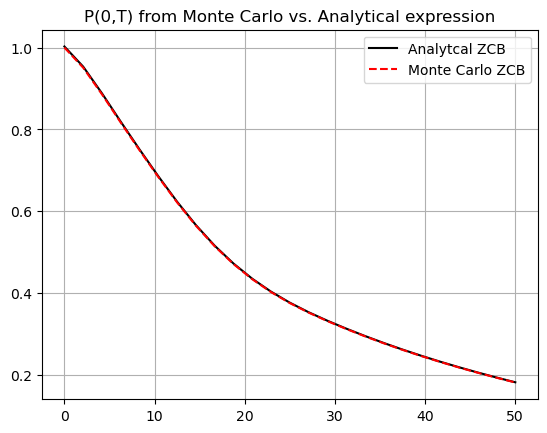

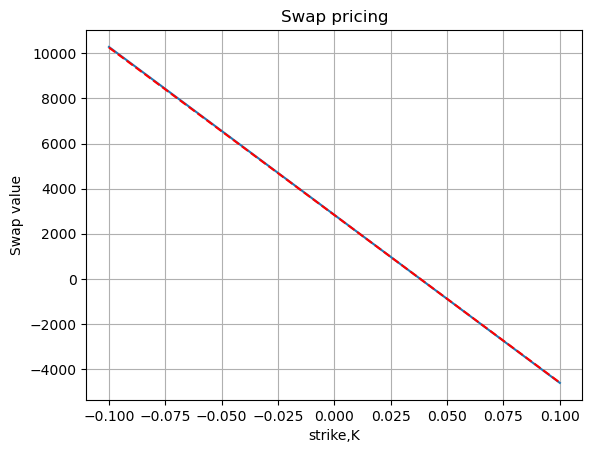

In [3]:
#%%
"""
Created on July 12 2021
Swaps computed from a yield curve and from the Hull-White Model

This code is purely educational and comes from "Financial Engineering" course by L.A. Grzelak
The course is based on the book “Mathematical Modeling and Computation
in Finance: With Exercises and Python and MATLAB Computer Codes”,
by C.W. Oosterlee and L.A. Grzelak, World Scientific Publishing Europe Ltd, 2019.
@author: Lech A. Grzelak
"""

import numpy as np
import enum 
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import interpolate
from scipy.optimize import newton

# This class defines puts and calls
class OptionTypeSwap(enum.Enum):
    RECEIVER = 1.0
    PAYER = -1.0

def GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, eta):    
    # time-step needed for differentiation
    dt = 0.0001    
    f0T = lambda t: - (np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    
    # Initial interest rate is a forward rate at time t->0
    r0 = f0T(0.00001)
    theta = lambda t: 1.0/lambd * (f0T(t+dt)-f0T(t-dt))/(2.0*dt) + f0T(t) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t))      
    
    #theta = lambda t: 0.1 +t -t
    #print("changed theta")
    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    R[:,0]=r0
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        R[:,i+1] = R[:,i] + lambd*(theta(time[i]) - R[:,i]) * dt + eta* (W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"R":R}
    return paths

def HW_theta(lambd,eta,P0T):
    dt = 0.0001    
    f0T = lambda t: - (np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    theta = lambda t: 1.0/lambd * (f0T(t+dt)-f0T(t-dt))/(2.0*dt) + f0T(t) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t))
    #print("CHANGED THETA")
    return theta#lambda t: 0.1+t-t
    
def HW_A(lambd,eta,P0T,T1,T2):
    tau = T2-T1
    zGrid = np.linspace(0.0,tau,250)
    B_r = lambda tau: 1.0/lambd * (np.exp(-lambd *tau)-1.0)
    theta = HW_theta(lambd,eta,P0T)    
    temp1 = lambd * integrate.trapz(theta(T2-zGrid)*B_r(zGrid),zGrid)
    
    temp2 = eta*eta/(4.0*np.power(lambd,3.0)) * (np.exp(-2.0*lambd*tau)*(4*np.exp(lambd*tau)-1.0) -3.0) + eta*eta*tau/(2.0*lambd*lambd)
    
    return temp1 + temp2

def HW_B(lambd,eta,T1,T2):
    return 1.0/lambd *(np.exp(-lambd*(T2-T1))-1.0)

def HW_ZCB(lambd,eta,P0T,T1,T2,rT1):
    n = np.size(rT1) 
        
    if T1<T2:
        B_r = HW_B(lambd,eta,T1,T2)
        A_r = HW_A(lambd,eta,P0T,T1,T2)
        return np.exp(A_r + B_r *rT1)
    else:
        return np.ones([n])

def HW_r_0(P0T,lambd,eta):
    # time-step needed for differentiation
    dt = 0.0001    
    f0T = lambda t: - (np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    # Initial interest rate is a forward rate at time t->0
    r0 = f0T(0.00001)
    return r0

def SwapPrice(CP,notional,K,t,Ti,Tm,n,P0T):
    # CP- payer of receiver
    # n- notional
    # K- strike
    # t- today's date
    # Ti- beginning of the swap
    # Tm- end of Swap
    # n- number of dates payments between Ti and Tm
    # r_t -interest rate at time t

    if n == 1:
        ti_grid =np.array([Ti,Tm])
    else:
        ti_grid = np.linspace(Ti,Tm,n)
    tau = ti_grid[1]- ti_grid[0]
    
    # overwrite Ti if t>Ti
    prevTi = ti_grid[np.where(ti_grid<t)]
    if np.size(prevTi) > 0: #prevTi != []:
        Ti = prevTi[-1]
    
    # Now we need to handle the case when some payments are already done
    ti_grid = ti_grid[np.where(ti_grid>t)]          

    temp= 0.0
    
    for (idx,ti) in enumerate(ti_grid):
        if ti>Ti:
            temp = temp + tau * P0T(ti)

    if CP==OptionTypeSwap.PAYER:
        swap = (P0T(Ti) - P0T(Tm)) - K * temp
    elif CP==OptionTypeSwap.RECEIVER:
        swap = K * temp- (P0T(Ti) - P0T(Tm))
    
    return swap*notional

def HW_SwapPrice(CP,notional,K,t,Ti,Tm,n,r_t,P0T,lambd,eta):
    # CP- payer of receiver
    # n- notional
    # K- strike
    # t- today's date
    # Ti- beginning of the swap
    # Tm- end of Swap
    # n- number of dates payments between Ti and Tm
    # r_t -interest rate at time t

    if n == 1:
        ti_grid =np.array([Ti,Tm])
    else:
        ti_grid = np.linspace(Ti,Tm,n)
    tau = ti_grid[1]- ti_grid[0]
    
    # overwrite Ti if t>Ti
    prevTi = ti_grid[np.where(ti_grid<t)]
    if np.size(prevTi) > 0: #prevTi != []:
        Ti = prevTi[-1]
    
    # Now we need to handle the case when some payments are already done
    ti_grid = ti_grid[np.where(ti_grid>t)]          

    temp= np.zeros(np.size(r_t));
    
    P_t_TiLambda = lambda Ti : HW_ZCB(lambd,eta,P0T,t,Ti,r_t)
    
    for (idx,ti) in enumerate(ti_grid):
        if ti>Ti:
            temp = temp + tau * P_t_TiLambda(ti)
            
    P_t_Ti = P_t_TiLambda(Ti)
    P_t_Tm = P_t_TiLambda(Tm)
    
    if CP==OptionTypeSwap.PAYER:
        swap = (P_t_Ti - P_t_Tm) - K * temp
    elif CP==OptionTypeSwap.RECEIVER:
        swap = K * temp- (P_t_Ti - P_t_Tm)
    
    return swap*notional

def mainCalculation():
    NoOfPaths = 2000
    NoOfSteps = 1000
    CP = OptionTypeSwap.PAYER
    lambd     = 0.5
    eta       = 0.03
    notional  = 10000.0 
    
    # We define a ZCB curve (obtained from the market), 1-D points with a B-spline curve.
    ti = [0.0,0.00273972600000000,0.0876712330000000,0.172602740000000,0.257534247000000,0.342465753000000,0.427397260000000,0.512328767000000,0.597260274000000,0.682191781000000,0.767123288000000,0.852054795000000,0.936986301000000,1.02191780800000,1.10684931500000,1.19178082200000,1.27671232900000,1.36164383600000,1.44657534200000,1.53150684900000,1.61643835600000,1.70136986300000,1.78630137000000,1.87123287700000,1.95616438400000,2.04109589000000,2.12602739700000,2.21095890400000,2.29589041100000,2.38082191800000,2.46575342500000,2.55068493200000,2.63561643800000,2.72054794500000,2.80547945200000,2.89041095900000,2.97534246600000,3.06027397300000,3.14520547900000,3.23013698600000,3.31506849300000,3.40000000000000,3.48493150700000,3.56986301400000,3.65479452100000,3.73972602700000,3.82465753400000,3.90958904100000,3.99452054800000,4.07945205500000,4.16438356200000,4.24931506800000,4.33424657500000,4.41917808200000,4.50410958900000,4.58904109600000,4.67397260300000,4.75890411000000,4.84383561600000,4.92876712300000,5.01369863000000,5.09863013700000,5.18356164400000,5.26849315100000,5.35342465800000,5.43835616400000,5.52328767100000,5.60821917800000,5.69315068500000,5.77808219200000,5.86301369900000,5.94794520500000,6.03287671200000,6.11780821900000,6.20273972600000,6.28767123300000,6.37260274000000,6.45753424700000,6.54246575300000,6.62739726000000,6.71232876700000,6.79726027400000,6.88219178100000,6.96712328800000,7.05205479500000,7.13698630100000,7.22191780800000,7.30684931500000,7.39178082200000,7.47671232900000,7.56164383600000,7.64657534200000,7.73150684900000,7.81643835600000,7.90136986300000,7.98630137000000,8.07123287700000,8.15616438400000,8.24109589000000,8.32602739700000,8.41095890400000,8.49589041100000,8.58082191800000,8.66575342500000,8.75068493200000,8.83561643800000,8.92054794500000,9.00547945200000,9.09041095900000,9.17534246600000,9.26027397300000,9.34520547900000,9.43013698600000,9.51506849300000,9.60000000000000,9.68493150700000,9.76986301400000,9.85479452100000,9.93972602700000,10.0246575300000,10.1095890400000,10.1945205500000,10.2794520500000,10.3643835600000,10.4493150700000,10.5342465800000,10.6191780800000,10.7041095900000,10.7890411000000,10.8739726000000,10.9589041100000,11.0438356200000,11.1287671200000,11.2136986300000,11.2986301400000,11.3835616400000,11.4684931500000,11.5534246600000,11.6383561600000,11.7232876700000,11.8082191800000,11.8931506800000,11.9780821900000,12.0630137000000,12.1479452100000,12.2328767100000,12.3178082200000,12.4027397300000,12.4876712300000,12.5726027400000,12.6575342500000,12.7424657500000,12.8273972600000,12.9123287700000,12.9972602700000,13.0821917800000,13.1671232900000,13.2520547900000,13.3369863000000,13.4219178100000,13.5068493200000,13.5917808200000,13.6767123300000,13.7616438400000,13.8465753400000,13.9315068500000,14.0164383600000,14.1013698600000,14.1863013700000,14.2712328800000,14.3561643800000,14.4410958900000,14.5260274000000,14.6109589000000,14.6958904100000,14.7808219200000,14.8657534200000,14.9506849300000,15.0356164400000,15.1205479500000,15.2054794500000,15.2904109600000,15.3753424700000,15.4602739700000,15.5452054800000,15.6301369900000,15.7150684900000,15.8000000000000,15.8849315100000,15.9698630100000,16.0547945200000,16.1397260300000,16.2246575300000,16.3095890400000,16.3945205500000,16.4794520500000,16.5643835600000,16.6493150700000,16.7342465800000,16.8191780800000,16.9041095900000,16.9890411000000,17.0739726000000,17.1589041100000,17.2438356200000,17.3287671200000,17.4136986300000,17.4986301400000,17.5835616400000,17.6684931500000,17.7534246600000,17.8383561600000,17.9232876700000,18.0082191800000,18.0931506800000,18.1780821900000,18.2630137000000,18.3479452100000,18.4328767100000,18.5178082200000,18.6027397300000,18.6876712300000,18.7726027400000,18.8575342500000,18.9424657500000,19.0273972600000,19.1123287700000,19.1972602700000,19.2821917800000,19.3671232900000,19.4520547900000,19.5369863000000,19.6219178100000,19.7068493200000,19.7917808200000,19.8767123300000,19.9616438400000,20.0465753400000,20.1315068500000,20.2164383600000,20.3013698600000,20.3863013700000,20.4712328800000,20.5561643800000,20.6410958900000,20.7260274000000,20.8109589000000,20.8958904100000,20.9808219200000,21.0657534200000,21.1506849300000,21.2356164400000,21.3205479500000,21.4054794500000,21.4904109600000,21.5753424700000,21.6602739700000,21.7452054800000,21.8301369900000,21.9150684900000,22,22.0849315100000,22.1698630100000,22.2547945200000,22.3397260300000,22.4246575300000,22.5095890400000,22.5945205500000,22.6794520500000,22.7643835600000,22.8493150700000,22.9342465800000,23.0191780800000,23.1041095900000,23.1890411000000,23.2739726000000,23.3589041100000,23.4438356200000,23.5287671200000,23.6136986300000,23.6986301400000,23.7835616400000,23.8684931500000,23.9534246600000,24.0383561600000,24.1232876700000,24.2082191800000,24.2931506800000,24.3780821900000,24.4630137000000,24.5479452100000,24.6328767100000,24.7178082200000,24.8027397300000,24.8876712300000,24.9726027400000,25.0575342500000,25.1424657500000,25.2273972600000,25.3123287700000,25.3972602700000,25.4821917800000,25.5671232900000,25.6520547900000,25.7369863000000,25.8219178100000,25.9068493200000,25.9917808200000,26.0767123300000,26.1616438400000,26.2465753400000,26.3315068500000,26.4164383600000,26.5013698600000,26.5863013700000,26.6712328800000,26.7561643800000,26.8410958900000,26.9260274000000,27.0109589000000,27.0958904100000,27.1808219200000,27.2657534200000,27.3506849300000,27.4356164400000,27.5205479500000,27.6054794500000,27.6904109600000,27.7753424700000,27.8602739700000,27.9452054800000,28.0301369900000,28.1150684900000,28.2000000000000,28.2849315100000,28.3698630100000,28.4547945200000,28.5397260300000,28.6246575300000,28.7095890400000,28.7945205500000,28.8794520500000,28.9643835600000,29.0493150700000,29.1342465800000,29.2191780800000,29.3041095900000,29.3890411000000,29.4739726000000,29.5589041100000,29.6438356200000,29.7287671200000,29.8136986300000,29.8986301400000,29.9835616400000,30.0684931500000,30.1534246600000,30.2383561600000,30.3232876700000,30.4082191800000,30.4931506800000,30.5780821900000,30.6630137000000,30.7479452100000,30.8328767100000,30.9178082200000,31.0027397300000,31.0876712300000,31.1726027400000,31.2575342500000,31.3424657500000,31.4273972600000,31.5123287700000,31.5972602700000,31.6821917800000,31.7671232900000,31.8520547900000,31.9369863000000,32.0219178100000,32.1068493200000,32.1917808200000,32.2767123300000,32.3616438400000,32.4465753400000,32.5315068500000,32.6164383600000,32.7013698600000,32.7863013700000,32.8712328800000,32.9561643800000,33.0410958900000,33.1260274000000,33.2109589000000,33.2958904100000,33.3808219200000,33.4657534200000,33.5506849300000,33.6356164400000,33.7205479500000,33.8054794500000,33.8904109600000,33.9753424700000,34.0602739700000,34.1452054800000,34.2301369900000,34.3150684900000,34.4000000000000,34.4849315100000,34.5698630100000,34.6547945200000,34.7397260300000,34.8246575300000,34.9095890400000,34.9945205500000,35.0794520500000,35.1643835600000,35.2493150700000,35.3342465800000,35.4191780800000,35.5041095900000,35.5890411000000,35.6739726000000,35.7589041100000,35.8438356200000,35.9287671200000,36.0136986300000,36.0986301400000,36.1835616400000,36.2684931500000,36.3534246600000,36.4383561600000,36.5232876700000,36.6082191800000,36.6931506800000,36.7780821900000,36.8630137000000,36.9479452100000,37.0328767100000,37.1178082200000,37.2027397300000,37.2876712300000,37.3726027400000,37.4575342500000,37.5424657500000,37.6273972600000,37.7123287700000,37.7972602700000,37.8821917800000,37.9671232900000,38.0520547900000,38.1369863000000,38.2219178100000,38.3068493200000,38.3917808200000,38.4767123300000,38.5616438400000,38.6465753400000,38.7315068500000,38.8164383600000,38.9013698600000,38.9863013700000,39.0712328800000,39.1561643800000,39.2410958900000,39.3260274000000,39.4109589000000,39.4958904100000,39.5808219200000,39.6657534200000,39.7506849300000,39.8356164400000,39.9205479500000,40.0054794500000]
    Pi = [1.0,0.999966573000000,0.998930882000000,0.997824062000000,0.996511145000000,0.995199956000000,0.993821602000000,0.992277014000000,0.990734827000000,0.989164324000000,0.987428762000000,0.985704346000000,0.983946708000000,0.982068207000000,0.980193293000000,0.978281187000000,0.976255832000000,0.974234670000000,0.972174514000000,0.970028236000000,0.967886697000000,0.965693800000000,0.963440984000000,0.961193424000000,0.958903753000000,0.956575247000000,0.954252397000000,0.951842433000000,0.949228406000000,0.946482248000000,0.943632525000000,0.940707509000000,0.937735160000000,0.934743101000000,0.931758611000000,0.928808623000000,0.925919731000000,0.923110403000000,0.920338655000000,0.917589739000000,0.914858924000000,0.912141532000000,0.909432941000000,0.906728583000000,0.904023944000000,0.901314567000000,0.898596044000000,0.895864025000000,0.893114214000000,0.890346348000000,0.887569841000000,0.884786140000000,0.881996090000000,0.879200528000000,0.876400278000000,0.873596157000000,0.870788975000000,0.867979528000000,0.865168605000000,0.862356987000000,0.859545442000000,0.856732322000000,0.853915005000000,0.851094371000000,0.848271318000000,0.845446732000000,0.842621487000000,0.839796449000000,0.836972470000000,0.834150393000000,0.831331050000000,0.828515261000000,0.825703790000000,0.822893949000000,0.820084325000000,0.817275636000000,0.814468590000000,0.811663887000000,0.808862219000000,0.806064266000000,0.803270701000000,0.800482187000000,0.797699379000000,0.794922921000000,0.792153338000000,0.789389717000000,0.786631547000000,0.783878633000000,0.781130782000000,0.778387801000000,0.775649505000000,0.772915708000000,0.770186227000000,0.767460882000000,0.764739497000000,0.762021898000000,0.759308200000000,0.756599781000000,0.753896558000000,0.751198194000000,0.748504356000000,0.745814715000000,0.743128950000000,0.740446741000000,0.737767776000000,0.735091745000000,0.732418345000000,0.729747277000000,0.727078670000000,0.724413443000000,0.721751645000000,0.719093279000000,0.716438346000000,0.713786850000000,0.711138792000000,0.708494177000000,0.705853006000000,0.703215284000000,0.700581015000000,0.697950202000000,0.695320544000000,0.692690217000000,0.690059929000000,0.687430378000000,0.684802253000000,0.682176235000000,0.679552992000000,0.676933185000000,0.674317462000000,0.671706465000000,0.669100824000000,0.666501159000000,0.663908082000000,0.661322194000000,0.658744089000000,0.656174348000000,0.653613545000000,0.651062245000000,0.648521002000000,0.645990363000000,0.643470865000000,0.640963036000000,0.638467395000000,0.635983411000000,0.633503959000000,0.631028021000000,0.628556105000000,0.626088714000000,0.623626343000000,0.621169478000000,0.618718599000000,0.616274178000000,0.613836679000000,0.611406558000000,0.608984265000000,0.606570242000000,0.604164924000000,0.601768738000000,0.599382105000000,0.597005438000000,0.594639144000000,0.592283621000000,0.589939262000000,0.587606453000000,0.585285574000000,0.582976996000000,0.580681085000000,0.578398202000000,0.576128698000000,0.573872922000000,0.571631214000000,0.569403908000000,0.567191334000000,0.564993814000000,0.562811666000000,0.560645202000000,0.558494727000000,0.556360543000000,0.554242913000000,0.552138115000000,0.550043470000000,0.547959012000000,0.545884776000000,0.543820795000000,0.541767101000000,0.539723726000000,0.537690699000000,0.535668051000000,0.533655809000000,0.531654001000000,0.529662652000000,0.527681790000000,0.525711438000000,0.523751620000000,0.521802360000000,0.519863678000000,0.517935598000000,0.516018137000000,0.514111318000000,0.512215157000000,0.510329674000000,0.508454885000000,0.506590807000000,0.504737456000000,0.502894847000000,0.501062994000000,0.499241910000000,0.497431609000000,0.495632103000000,0.493843403000000,0.492065521000000,0.490298466000000,0.488542249000000,0.486796879000000,0.485062364000000,0.483338711000000,0.481625929000000,0.479924024000000,0.478233003000000,0.476552870000000,0.474883632000000,0.473225293000000,0.471577858000000,0.469941330000000,0.468315712000000,0.466701007000000,0.465097218000000,0.463504347000000,0.461922395000000,0.460351364000000,0.458791253000000,0.457242065000000,0.455703798000000,0.454176452000000,0.452660027000000,0.451154522000000,0.449659935000000,0.448176257000000,0.446703083000000,0.445240105000000,0.443787209000000,0.442344286000000,0.440911226000000,0.439487920000000,0.438074261000000,0.436670143000000,0.435275460000000,0.433890109000000,0.432513986000000,0.431146989000000,0.429789017000000,0.428439971000000,0.427099751000000,0.425768260000000,0.424445399000000,0.423131074000000,0.421825189000000,0.420527650000000,0.419238363000000,0.417957237000000,0.416684180000000,0.415419101000000,0.414161910000000,0.412912520000000,0.411670842000000,0.410436789000000,0.409210275000000,0.407991213000000,0.406779521000000,0.405575114000000,0.404377909000000,0.403187824000000,0.402004777000000,0.400828688000000,0.399659478000000,0.398497066000000,0.397341375000000,0.396192326000000,0.395049844000000,0.393913852000000,0.392784274000000,0.391661036000000,0.390544064000000,0.389433283000000,0.388328623000000,0.387230010000000,0.386137373000000,0.385050641000000,0.383969745000000,0.382894615000000,0.381825182000000,0.380761378000000,0.379703135000000,0.378650387000000,0.377603067000000,0.376561110000000,0.375524516000000,0.374495509000000,0.373475055000000,0.372462955000000,0.371459016000000,0.370463043000000,0.369474847000000,0.368494238000000,0.367521029000000,0.366555034000000,0.365596072000000,0.364643959000000,0.363698516000000,0.362759566000000,0.361826932000000,0.360900441000000,0.359979918000000,0.359065194000000,0.358156099000000,0.357252465000000,0.356354126000000,0.355460918000000,0.354572678000000,0.353689243000000,0.352810455000000,0.351936156000000,0.351066187000000,0.350200393000000,0.349338622000000,0.348480719000000,0.347626535000000,0.346775919000000,0.345928722000000,0.345084799000000,0.344244003000000,0.343406190000000,0.342571217000000,0.341738943000000,0.340909228000000,0.340081932000000,0.339256917000000,0.338434048000000,0.337613190000000,0.336794207000000,0.335976969000000,0.335161343000000,0.334347200000000,0.333534411000000,0.332722847000000,0.331912384000000,0.331102895000000,0.330294257000000,0.329486347000000,0.328679044000000,0.327872227000000,0.327065778000000,0.326259578000000,0.325453511000000,0.324647462000000,0.323841447000000,0.323037558000000,0.322236538000000,0.321438361000000,0.320642997000000,0.319850421000000,0.319060604000000,0.318273519000000,0.317489140000000,0.316707441000000,0.315928394000000,0.315151974000000,0.314378155000000,0.313606911000000,0.312838216000000,0.312072045000000,0.311308373000000,0.310547175000000,0.309788426000000,0.309032102000000,0.308278178000000,0.307526629000000,0.306777432000000,0.306030564000000,0.305285999000000,0.304543716000000,0.303803690000000,0.303065898000000,0.302330318000000,0.301596926000000,0.300865701000000,0.300136619000000,0.299409659000000,0.298684798000000,0.297962014000000,0.297241286000000,0.296522593000000,0.295805912000000,0.295091222000000,0.294378503000000,0.293667734000000,0.292958894000000,0.292251962000000,0.291546917000000,0.290843741000000,0.290142412000000,0.289442910000000,0.288745217000000,0.288049311000000,0.287355175000000,0.286662788000000,0.285972131000000,0.285283185000000,0.284595932000000,0.283910353000000,0.283226429000000,0.282544142000000,0.281863473000000,0.281184405000000,0.280506920000000,0.279830999000000,0.279156625000000,0.278483781000000,0.277812449000000,0.277142612000000,0.276474253000000,0.275807354000000,0.275141900000000,0.274477873000000,0.273815257000000,0.273154036000000,0.272494193000000,0.271835712000000,0.271178577000000,0.270522772000000,0.269868283000000,0.269215092000000,0.268563184000000,0.267912545000000,0.267263159000000,0.266615011000000,0.265968086000000,0.265322370000000,0.264677847000000,0.264034503000000,0.263392324000000,0.262751295000000,0.262111403000000,0.261472633000000,0.260834972000000,0.260198405000000,0.259562919000000,0.258928501000000,0.258295136000000,0.257662813000000,0.257031517000000,0.256401236000000,0.255771957000000,0.255143667000000,0.254516353000000,0.253890002000000,0.253264603000000,0.252640144000000,0.252016611000000,0.251393992000000,0.250772277000000,0.250151453000000,0.249531508000000,0.248912431000000,0.248294210000000,0.247676834000000,0.247060291000000,0.246444571000000,0.245829663000000,0.245215555000000,0.244602237000000,0.243989698000000,0.243377928000000]
    interpolator =  interpolate.splrep(ti, Pi, s=0.0001)
    P0T = lambda T: interpolate.splev(T, interpolator, der=0)
    
    r0 = HW_r_0(P0T,lambd,eta)
    
    # In this experiment we compare ZCB from the Market and Analytical expression
    N = 25
    T_end = 50
    Tgrid= np.linspace(0,T_end,N)
    
    Exact = np.zeros([N,1])
    Proxy= np.zeros ([N,1])
    for i,Ti in enumerate(Tgrid):
        Proxy[i] = HW_ZCB(lambd,eta,P0T,0.0,Ti,r0)
        Exact[i] = P0T(Ti)
        
    plt.figure(1)
    plt.grid()
    plt.plot(Tgrid,Exact,'-k')
    plt.plot(Tgrid,Proxy,'--r')
    plt.legend(["Analytcal ZCB","Monte Carlo ZCB"])
    plt.title('P(0,T) from Monte Carlo vs. Analytical expression')
    
    
    # Here we simulate the exposure profiles for a swap, using the HW model    
    # Swap settings
    K = np.linspace(-0.1,0.1,25)  # strike
    Ti = 1.0  # begining of the swap
    Tm = 10.0 # end date of the swap 
    n = 10    # number of payments between Ti and Tm
    

    paths= GeneratePathsHWEuler(NoOfPaths, NoOfSteps,Tm + 1.0, P0T, lambd, eta)

    r = paths["R"]
    timeGrid = paths["time"]
    dt = timeGrid[1]-timeGrid[0]
    
    # Here we compare the price of an option on a ZCB from Monte Carlo and Analytical expression    
    M_t = np.zeros([NoOfPaths,NoOfSteps])
            
    for i in range(0,NoOfPaths):
        M_t[i,:] = np.exp(np.cumsum(r[i,0:-1])*dt)
        
    # Portfolio without netting    
    VSwapHW = np.zeros(len(K))
    VSwap = np.zeros(len(K))
    t0= 0
    for (idx,Ki) in enumerate(K):
        VHW = HW_SwapPrice(CP,notional,Ki,t0,Ti,Tm,n,r0,P0T,lambd,eta)
        V = SwapPrice(CP,notional,Ki,t0,Ti,Tm,n,P0T) 
        VSwap[idx] = V
        VSwapHW[idx] = VHW[0]
    
    plt.figure(2)
    plt.plot(K,VSwap)
    plt.plot(K,VSwapHW,'--r')
    plt.grid()
    plt.xlabel('strike,K')
    plt.ylabel('Swap value')
    plt.title('Swap pricing')
    
    # Computation for Swap Par
    K=0.0
    print('Swap price for K = 0 is {0}'.format(SwapPrice(CP,notional,K,t0,Ti,Tm,n,P0T)))
    
    # Determine a part swap
    func = lambda k: SwapPrice(CP,notional,k,t0,Ti,Tm,n,P0T)
    K_par = newton(func, 0.0)
    print('Swap price for K_par = {0} is {1}'.format(K_par,SwapPrice(CP,notional,K_par,t0,Ti,Tm,n,P0T)))
    
    
mainCalculation()